# <span style="color:#5C8374"> Análisis Predictivo de Abandono de Clientes en la Industria Bancaria: Una Estrategia para Mejorar la Retención de Clientes

# <span style="color:#5C8374"> Introducción


> En el competitivo mundo de la banca, la retención de clientes es crucial para el éxito a largo plazo. La capacidad de prever qué clientes están en riesgo de abandonar un banco puede ser la diferencia entre mantener una base de clientes sólida y ver una disminución en la lealtad de los clientes. En este contexto, el presente estudio se centra en la aplicación de modelos de aprendizaje automático para predecir la probabilidad de abandono de clientes en un banco. Utilizando datos históricos de clientes, se busca desarrollar un modelo preciso que identifique los clientes con mayor probabilidad de abandonar la institución financiera. Estos esfuerzos tienen como objetivo permitir al banco implementar estrategias proactivas para retener a los clientes en riesgo, mejorar la satisfacción del cliente y mantener una base de clientes sólida y leal.

## <span style="color:#B99470"> Datos 

> - 1.1 Impprtar librerias
> - 1.2 Cargar los datos

### <span style="color:#B99470"> Importar librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,label_binarize
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix,
                             plot_confusion_matrix, 
                             recall_score, 
                             precision_score, 
                             f1_score, 
                             roc_curve, 
                             roc_auc_score,
                             precision_recall_curve, 
                             auc)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from itertools import cycle
from sklearn.utils import shuffle



### <span style="color:#B99470"> Cargar los datos

In [2]:
bank_df = pd.read_csv("/datasets/Churn.csv")

## <span style="color:#2D9596"> Preparar los datos
> - 2.1 Descripción de los datos
> - 2.2 Análisis exploratorio del DataFrame: bank_df
> - 2.3 Observaciones del análisis exploratorio
> - 2.4 Corección de los datos
> - 2.5 Presentación gráfica de los datos antes de su preparación
>     - 2.5.1 Género
>     - 2.5.2 Tasa de abandono por país
>     - 2.5.3 Edad
>     - 2.5.4 Productos
>     - 2.5.5 Tasa de abandono por número de productos
>     - 2.5.6 Edades de los Clientes que Abandonan bs No abandonan
>     - 2.5.7 Relación entre Edad, Saldo y Abandono
>     - 2.5.8 Correlaciones con el abandono del banco
>     - 2.5.9 Abandonos por Género
>     - 2.5.10 Distribución de Saldo por País y Género
> - 2.6 Clasificación OHE
> - 2.7 Estandarización de los datos
> - 2.8 Segmentación de los datos
> - 2.9 Preparar datos Sobremuestreo
> - 2.10 Preparar datos Submuestreo


###  <span style="color:#2D9596"> Descripción de los datos 

__Caracteristicas del DataFrame:__

> - RowNumber: índice de cadena de datos
> - *CustomerId:* identificador de cliente único
> - *Surname:* apellido
> - *CreditScore:* valor de crédito
> - *Geography:* país de residencia
> - *Gender:* sexo
> - *Age:* edad
> - *Tenure:* período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
> - *Balance:* saldo de la cuenta
> - *NumOfProducts:* número de productos bancarios utilizados por el cliente
> - *HasCrCard:* el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
> - *IsActiveMember:* actividad del cliente (1 - sí; 0 - no)
> - *EstimatedSalary:* salario estimado
> 
> **Objetivo**
> 
> - *Exited:* El cliente se ha ido (1 - sí; 0 - no)

### <span style="color:#2D9596"> Análisis exploratorio del DataFrame: bank_df

In [3]:
bank_df.info(show_counts=True)
print()
print("Filas completamente duplicadas:")
print(bank_df.duplicated().sum())
print()
print("El cliente se ha ido 1 - sí; 0 - no")
print(bank_df["Exited"].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

Filas completamente duplicadas:
0

El cliente se ha ido 1 - sí; 0 - no
0    0.7963
1    0.203

In [4]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### <span style="color:#2D9596"> Observaciones del análisis exploratorio

> - Los nombres de las columnas deben estar en minúsculas.
> - Tenure: presenta 909 valores ausentes: Representa el período durante el cual ha madurado el depósito a plazo fijo de un cliente (en años), la presencia de valores nulos sugiere que algunos clientes pueden no tener esta información registrada.
> - Podemos considerar que el DataFrame está desequilibrado en términos de la variable objetivo (Exited
>> - 79.63% Permanecen 
>> - 20.37 Se fueron
> - La columna RowNumber funciona como índice dentro del Dataframe y no aporta información relevante para el análisis.


### <span style="color:#2D9596">Corrección de los datos

In [5]:
# Pasar a minúsculas
bank_df.columns = bank_df.columns.str.lower()

# Rellenar con 0s la columna tenure
bank_df['tenure'] = bank_df['tenure'].fillna(0)

# Eliminar la columna RowNumber
bank_df = bank_df.drop(columns=['rownumber'])

# Mostrar información del DataFrame resultante
print(bank_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       10000 non-null  int64  
 1   surname          10000 non-null  object 
 2   creditscore      10000 non-null  int64  
 3   geography        10000 non-null  object 
 4   gender           10000 non-null  object 
 5   age              10000 non-null  int64  
 6   tenure           10000 non-null  float64
 7   balance          10000 non-null  float64
 8   numofproducts    10000 non-null  int64  
 9   hascrcard        10000 non-null  int64  
 10  isactivemember   10000 non-null  int64  
 11  estimatedsalary  10000 non-null  float64
 12  exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB
None


### <span style="color:#6DB9EF"> Presentación gráfica de los datos antes de su preparación.

#### <span style="color:#6DB9EF"> Género 

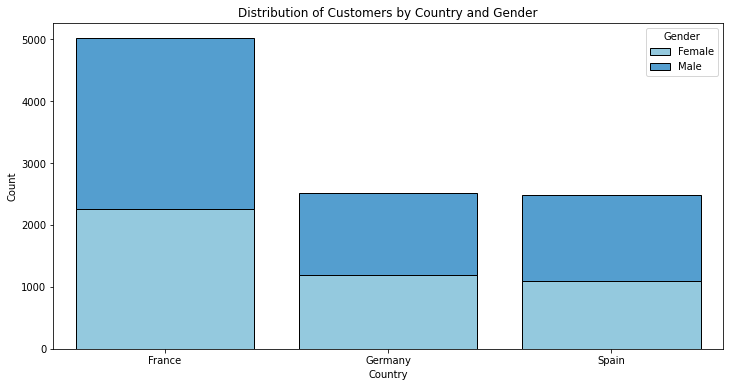

In [6]:
# Agrupar los datos por país y género y contar el número de clientes en cada grupo
grouped = bank_df.groupby(['geography', 'gender']).size().unstack()

# Crear la gráfica de barras apiladas
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped.index, y=grouped['Female'], color='skyblue', edgecolor = "black", label='Female')
sns.barplot(x=grouped.index, y=grouped['Male'], bottom=grouped['Female'], color='#40A2E3', edgecolor = "black",label='Male')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Customers by Country and Gender')
plt.legend(title='Gender', loc='upper right')
plt.show()


__Comentario:__
> El banco tiene operaciones en Europa, especificamente en Francia (dónde tiene más clientes), Alemania y España.

#### <span style="color:#6DB9EF"> Tasa de abandono por país

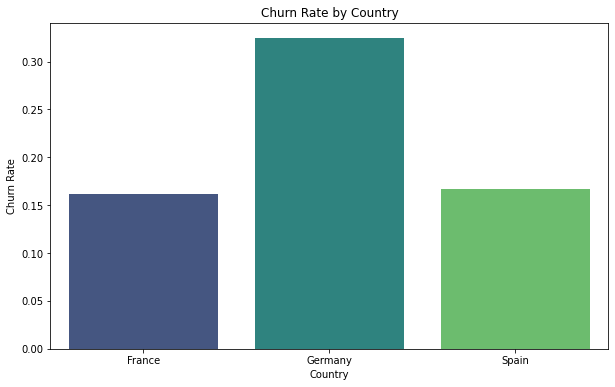

In [7]:
# Calcular la tasa de abandono por país
exit_rates_country = bank_df.groupby('geography')['exited'].mean().reset_index()

# Crear un gráfico de barras para mostrar la tasa de abandono por país
plt.figure(figsize=(10, 6))
sns.barplot(x='geography', y='exited', data=exit_rates_country, palette='viridis')
plt.title('Churn Rate by Country')
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.show()

__Comentario:__
> Alemania tiene la mayor tasa de abandono entre los tres países considerados. Esto podría deberse a una variedad de factores, como diferencias en la competencia entre bancos en cada país, diferencias en las preferencias y comportamientos financieros de los clientes, o incluso diferencias en la calidad de los servicios bancarios ofrecidos en cada país. 

#### <span style="color:#6DB9EF"> Edad

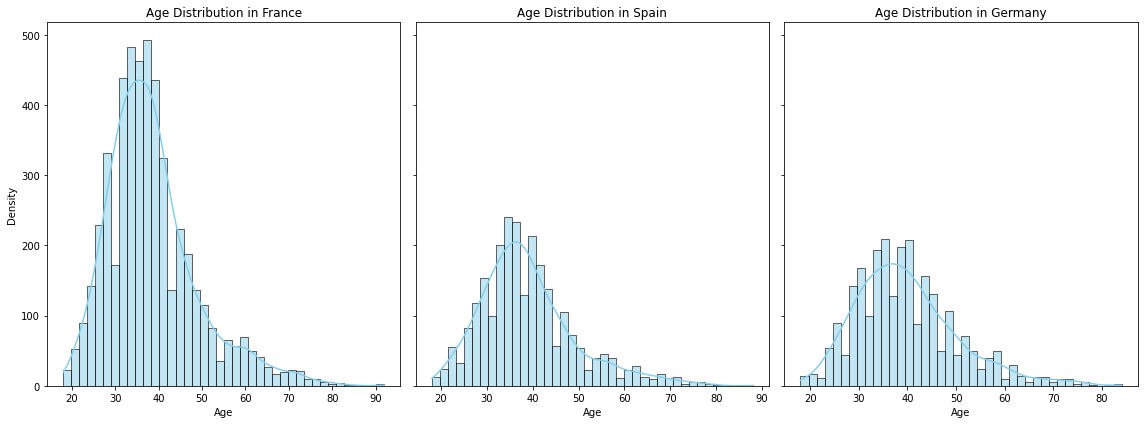

In [10]:
# Crear subgráficos para cada país
fig, axes = plt.subplots(1, 3, figsize=(16,6), sharey=True)

# Iterar sobre cada país y crear un histograma de la edad de los clientes
for i, country in enumerate(bank_df['geography'].unique()):
    sns.histplot(bank_df[bank_df['geography'] == country]['age'], ax=axes[i], bins=40, color='skyblue', edgecolor='black', kde=True)
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Age Distribution in {country}')

plt.tight_layout()
plt.show()


__Comentario:__

> - __Demografía:__ Puede reflejar la distribución de la población en general, donde ciertas cohortes de edad son más numerosas que otras.
> - __Comportamiento financiero:__ Las personas en ese rango de edad pueden estar en una etapa de la vida en la que están más establecidas financieramente y son más propensas a utilizar servicios bancarios.
> - __Productos y servicios ofrecidos:__ Los productos y servicios bancarios pueden ser más atractivos o relevantes para las personas en ese rango de edad, lo que resulta en una mayor concentración de clientes en ese grupo.
> - __Ciclo de vida:__ Muchas personas en ese rango de edad pueden estar en un punto de transición importante en sus vidas, como comprar una casa, tener hijos o planificar su jubilación, lo que puede influir en sus necesidades bancarias.

#### <span style="color:#6DB9EF"> Productos

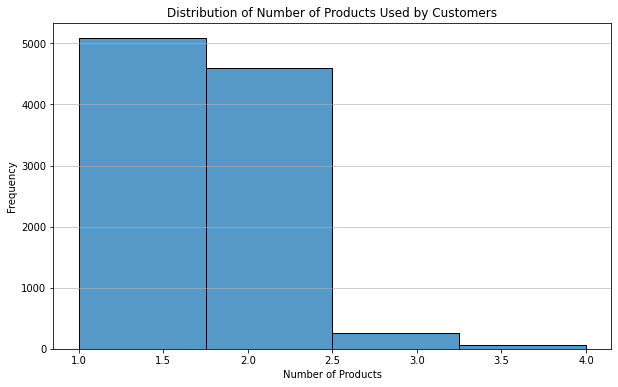

In [11]:
# Crear el histograma del número de productos utilizados por los clientes
plt.figure(figsize=(10, 6))
sns.histplot(bank_df['numofproducts'], bins=4, palette='viridis')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Products Used by Customers')
plt.grid(axis='y', alpha=0.75)
plt.show()

__Comentario:__

> - __Necesidades básicas:__ Muchos clientes pueden encontrar que uno o dos productos satisfacen sus necesidades bancarias básicas, como una cuenta corriente y una tarjeta de crédito.
> - __Costos:__ El costo adicional de tener más productos bancarios puede disuadir a los clientes de adquirir más de lo necesario.
> - __Diversificación:__ Algunos clientes pueden preferir diversificar sus productos financieros, pero pueden no necesitar o estar interesados en tener todos los productos disponibles.
> - __Ofertas y promociones:__ Los bancos a menudo ofrecen incentivos para que los clientes adquieran más productos, pero la mayoría de los clientes pueden no encontrar estas ofertas lo suficientemente atractivas como para adquirir más productos.
> - __Comportamiento del cliente:__ El comportamiento y las preferencias individuales de los clientes pueden variar, lo que puede resultar en algunos clientes que adquieren más productos mientras que otros prefieren mantenerse con un número menor.

#### <span style="color:#6DB9EF"> Tasa de abandono por número de productos

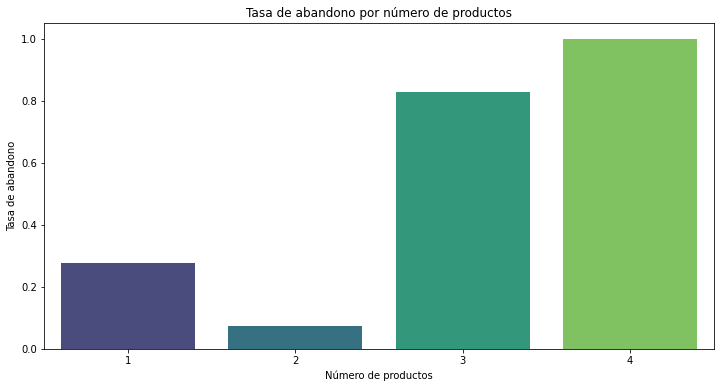

In [12]:
# Calcular la tasa de abandono por número de productos
exit_rates = bank_df.groupby('numofproducts')['exited'].mean().reset_index()

# Crear un gráfico de barras para mostrar la tasa de abandono por número de productos
plt.figure(figsize=(12, 6))
sns.barplot(x='numofproducts', y='exited', data=exit_rates, palette='viridis')
plt.title('Tasa de abandono por número de productos')
plt.xlabel('Número de productos')
plt.ylabel('Tasa de abandono')
plt.show()


__Comentarios:__

> Los clientes que tienen contratados 3 o 4 productos pueden tener diferentes motivaciones para abandonar el banco, como posiblemente sentirse insatisfechos con los servicios ofrecidos o encontrar mejores ofertas en otros bancos. Esta información puede ser útil para el banco al diseñar estrategias para retener a estos clientes, como mejorar la calidad de los servicios o ofrecer incentivos para que permanezcan en el banco.

#### <span style="color:#6DB9EF">  Edades de Clientes que Abandonan vs. No Abandonan

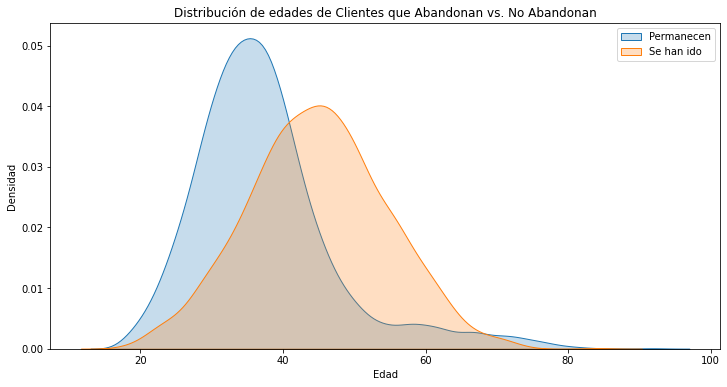

In [13]:
# Crear un gráfico de densidad para la distribución de edades de clientes que abandonan y no abandonan el banco
plt.figure(figsize=(12, 6))
sns.kdeplot(bank_df[bank_df['exited'] == 0]['age'], label='Permanecen', shade=True)
sns.kdeplot(bank_df[bank_df['exited'] == 1]['age'], label='Se han ido', shade=True)
plt.title('Distribución de edades de Clientes que Abandonan vs. No Abandonan')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend()
plt.show()

__Comentario:__

> Es interesante ver cómo la distribución de la edad de los clientes que abandonan el banco se alinea con la forma de una campana de Gauss en el rango de 40 a 55 años. Esta observación podría sugerir que hay un grupo particular de clientes en ese rango de edad que tiene más probabilidades de abandonar el banco.
>
> La coincidencia con la cantidad de clientes que tienen solo un producto contratado también es notable y podría indicar una posible relación entre tener un solo producto y la probabilidad de abandonar el banco en ese grupo de edad específico. Sería interesante investigar más a fondo las causas subyacentes de esta relación y cómo podrían influir en las estrategias de retención de clientes del banco.

#### <span style="color:#6DB9EF">  Relación entre Edad, Saldo y Abandono

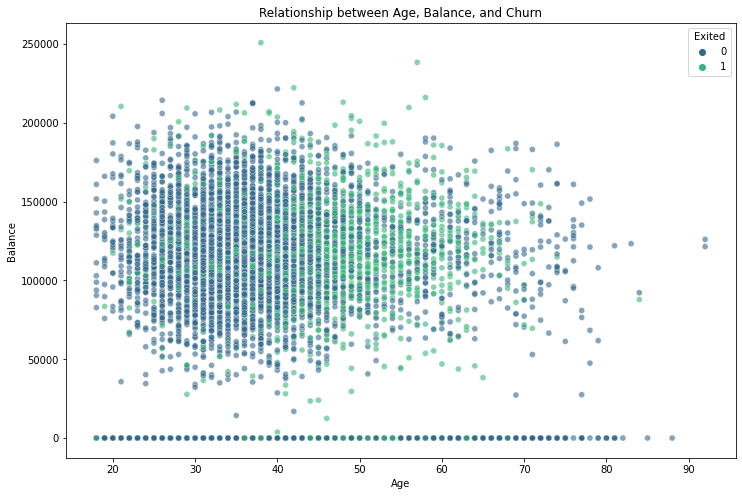

In [14]:
# Crear un gráfico de dispersión que muestre la relación entre la edad, el saldo de cuenta y el abandono del banco
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='balance', hue='exited', data=bank_df, palette='viridis', alpha=0.6)
plt.title('Relationship between Age, Balance, and Churn')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Exited', loc='upper right')
plt.show()

__Comentario:__

> Hay una concentración de puntos más densa en el rango de edades entre 30 y 40 años, que luego se va desvaneciendo a medida que aumenta la edad. Esto podría indicar que la mayoría de los clientes con saldos de cuenta más altos se encuentran en ese rango de edades, y a medida que los clientes envejecen, es menos probable que tengan saldos de cuenta tan altos.
> 
> Esta observación podría tener implicaciones interesantes, ya que podría sugerir que los clientes más jóvenes tienden a tener saldos de cuenta más altos, posiblemente debido a mayores ingresos o ahorros acumulados. Por otro lado, los clientes mayores podrían tener saldos de cuenta más bajos debido a jubilación u otras circunstancias.

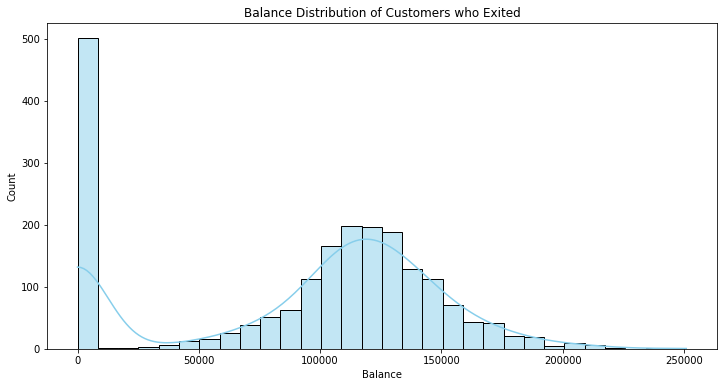

In [15]:
# Crear un histograma o un gráfico de densidad del saldo de cuenta de los clientes que abandonan el banco
plt.figure(figsize=(12, 6))
sns.histplot(bank_df[bank_df['exited'] == 1]['balance'], bins=30, kde=True, color='skyblue')
plt.title('Balance Distribution of Customers who Exited')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()


__Comentario:__

> La presencia de 500 clientes con un saldo de cuenta de 0 podría indicar que estos clientes cerraron sus cuentas con un saldo nulo. Por otro lado, la presencia de unos 800 clientes con un saldo primedio de 120,000 podría indicar que estos clientes tenían un saldo promedio al abandonar el banco. Estos patrones en la distribución del saldo de cuenta pueden ser útiles para el banco al analizar las razones detrás del abandono de estos clientes y al diseñar estrategias para retener a los clientes con saldos más altos.

#### <span style="color:#6DB9EF">  Correlaciones con el Abandono del banco

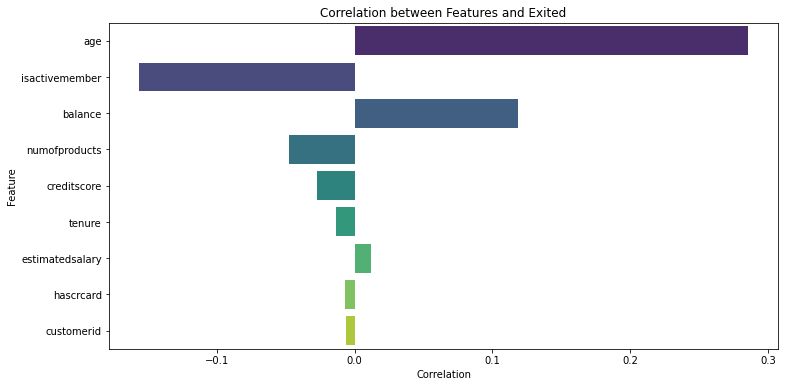

In [16]:
# Obtener las columnas numéricas
numeric_columns = bank_df.select_dtypes(include=[np.number]).columns.tolist()

# Crear un diccionario para almacenar las correlaciones
correlations = {}

# Calcular las correlaciones con 'exited' para las columnas numéricas
for column in numeric_columns:
    if column != 'exited':
        correlation = bank_df[column].corr(bank_df['exited'])
        correlations[column] = correlation
    
# Crear un DataFrame para las correlaciones
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

# Ordenar el DataFrame por valor absoluto de correlación
correlation_df['Abs Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values('Abs Correlation', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=correlation_df, x='Correlation', y='Feature', palette='viridis')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Correlation between Features and Exited')
plt.show()


__Comentario:__

> - La correlación positiva más fuerte se encuentra entre la edad (Age) y el abandono (Exited), lo que sugiere que a medida que la edad aumenta, es más probable que un cliente abandone el banco. 
>
> - Por otro lado, la correlación más negativa se encuentra con si el cliente es miembro activo (IsActiveMember), lo que sugiere que los clientes que no son miembros activos tienden a tener una mayor probabilidad de abandonar el banco.
> En resumen, a pesar de que las correlaciones no son cercanas a 1, sí que son indicadores para el abandono del banco, las más importantes son:
>> - Edad
>> - Actividad
>> - Saldo

#### <span style="color:#6DB9EF">  Abandonos por género

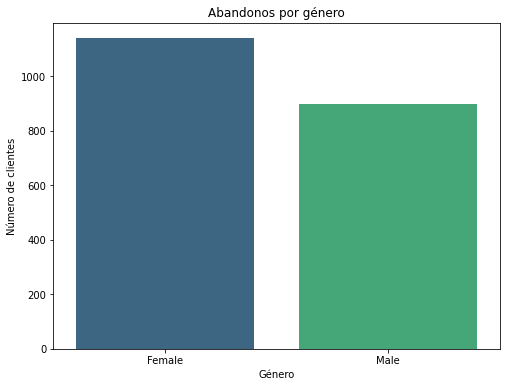

In [17]:
# Contar el número de clientes de cada género que han abandonado el banco
gender_exit_counts = bank_df[bank_df['exited'] == 1]['gender'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_exit_counts.index, y=gender_exit_counts.values, palette='viridis')
plt.title('Abandonos por género')
plt.xlabel('Género')
plt.ylabel('Número de clientes')
plt.show()

__Comentario:__

> Aunque las razones detrás de esta disparidad pueden ser diversas y específicas a cada caso individual, esta información puede ser útil para que el banco pueda investigar más a fondo las posibles causas y considerar estrategias para retener a las clientes femeninas.


#### <span style="color:#6DB9EF">  Distribución de Saldo por País y Género

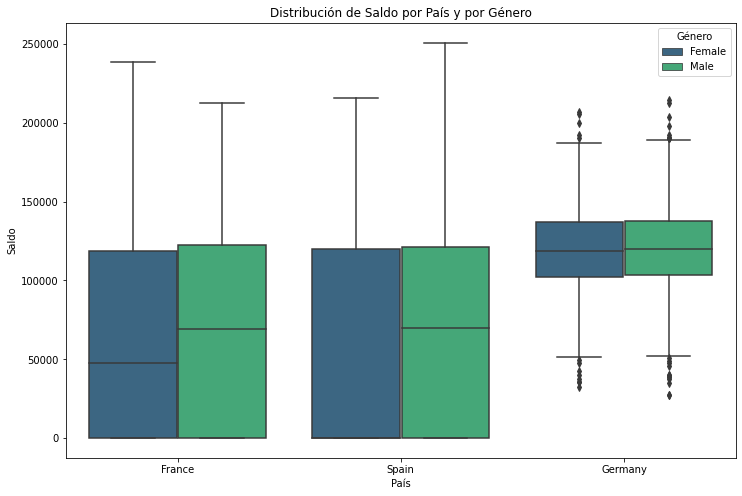

In [18]:
# Crear un gráfico de caja para la distribución de saldos por país y género
plt.figure(figsize=(12, 8))
sns.boxplot(x='geography', y='balance', hue='gender', data=bank_df, palette='viridis')
plt.title('Distribución de Saldo por País y por Género')
plt.xlabel('País')
plt.ylabel('Saldo')
plt.legend(title='Género')
plt.show()

__Comentarios:__

> - __Factores Económicos:__ Las diferencias en los saldos de cuenta podrían reflejar diferencias en los niveles de ingresos y riqueza entre países. Por ejemplo, Alemania, como una economía más grande y desarrollada, podría tener una población con mayores ingresos y, por lo tanto, saldos de cuenta más altos en promedio en comparación con otros países.
> - __Cultura Financiera:__ La cultura financiera de cada país también puede influir en los hábitos de ahorro e inversión de sus ciudadanos. Por ejemplo, en algunos países, la cultura puede favorecer el ahorro y la inversión prudente, lo que podría resultar en saldos de cuenta más altos.
> - __Diferencias en Costos de Vida:__ Los costos de vida varían significativamente entre países, lo que puede afectar la capacidad de las personas para ahorrar y mantener saldos más altos en sus cuentas bancarias.
> - __Estrategias de Mercado:__ Los bancos pueden tener estrategias de mercado diferentes en cada país, lo que podría influir en la cantidad de clientes y los saldos de cuenta. Por ejemplo, en un país donde se promueven más los servicios financieros de alto valor, es posible que los saldos de cuenta sean más altos en promedio.

### <span style="color:#2D9596">Clasificación OHE

In [19]:
# Aplicar OHE a todas las columnas categóricas del DataFrame
bank_df = pd.get_dummies(bank_df, drop_first=True)

# Verificar número de columnas despueste de la codificación
num_columns = bank_df.shape[1]
print("Número de columnas:", num_columns)

Número de columnas: 2944


### <span style="color:#2D9596"> Estandarización de los datos 

In [20]:
# Crear máscara de columnas a estandarizar
standar = ["creditscore","age","tenure","balance","estimatedsalary"]

# Crer una copia para evitar mensajes de advertencia
bank_df_copy = bank_df.copy()

# Aplicar método 
scaler = StandardScaler()
scaler.fit(bank_df_copy[standar])


bank_df_copy.loc[:, standar] = scaler.transform(bank_df_copy.loc[:, standar])

bank_df1 = bank_df_copy


### <span style="color:#2D9596"> Segementación de los datos

In [21]:
# Crear dos variables "objetivo" y "caracteristicas"

objetivo = bank_df["exited"]
caracteristicas = bank_df.drop("exited", axis=1)


# Dividir los datos en: train, valid y testeto

# Testeto
feat_train_valid, feat_test, ob_train_valid, ob_test = train_test_split(
                                                                        caracteristicas, 
                                                                        objetivo, 
                                                                        test_size=0.25,  # Definir % para testeo
                                                                        random_state=12
                                                                        )

# Entrenamiento y Validación
feat_train, feat_valid, ob_train, ob_valid = train_test_split(
                                                              feat_train_valid, 
                                                              ob_train_valid, 
                                                              test_size=0.25,  # Usar % para validación
                                                              random_state=12
                                                              )


# Presentar los conjuntos entrenamiento, validación y prueba
print("Entrenamiento:", len(feat_train))
print("Validación:", len(feat_valid))
print("Prueba:", len(feat_test))
print("Verificando la suma de las pertes:",len(feat_train)+len(feat_valid)+len(feat_test))

Entrenamiento: 5625
Validación: 1875
Prueba: 2500
Verificando la suma de las pertes: 10000


### <span style="color:#2D9596"> Preprar datos Sobremuestreo

In [22]:
#Crear función para realizar el sobremuestro

def upsample(features, target, repeat=None):
    if repeat is None:
        repeat = len(features[target == 0]) // len(features[target == 1])

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    arg1 = pd.concat([features_zeros] + [features_ones] * repeat)
    arg2 = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(arg1, arg2, random_state=12)

    return features_upsampled, target_upsampled

# Llamar a la función
feat_up, ob_up = upsample(feat_train, ob_train)

# Mostrar el tamaño del DataFrame
print(feat_up.shape)
print(ob_up.shape)



(8943, 2943)
(8943,)


### <span style="color:#2D9596"> Preparar datos Submuestreo

In [23]:
# Crear función para el submuestreo
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
                                    [features_zeros.sample(frac=fraction, random_state=12)]
                                  + [features_ones]
                                    )
    target_downsampled = pd.concat(
                                    [target_zeros.sample(frac=fraction, random_state=12)]
                                  + [target_ones]
                                   )

    features_downsampled, target_downsampled = shuffle(
                                                        features_downsampled, 
                                                        target_downsampled, 
                                                        random_state=12
                                                       )

    return features_downsampled, target_downsampled




# Llamar a la función 
feat_down, ob_down = downsample(
                                  feat_train, 
                                  ob_train, 
                                  0.3
                                 )

# Mostrar resultados
print(feat_down.shape)
print(ob_down.shape)

(2462, 2943)
(2462,)


## <span style="color:#427D9D"> Árbol de decisión - ROC

El siguiente código evalua:
> - Entrenamiento y Validación
> - Testeo
> - F1
> - Recall
> - Matriz de confusión
> - AUC - ROC

Para:
> - Datos sin considerar el desequilibrio
> - Sobremuestreo
> - Submuestreo

Resultados para Normal:
Mejor max_depth = 5 con precisión de: 0.8549333333333333
Test accuracy: 0.8284
F1 score: 0.5830903790087464
Recall: 0.539568345323741

Resultados para Sobremuestreo:
Mejor max_depth = 19 con precisión de: 0.8064
Test accuracy: 0.8136
F1 score: 0.5919439579684763
Recall: 0.6079136690647482

Resultados para Submuestreo:
Mejor max_depth = 3 con precisión de: 0.8224
Test accuracy: 0.7644
F1 score: 0.5684981684981685
Recall: 0.697841726618705



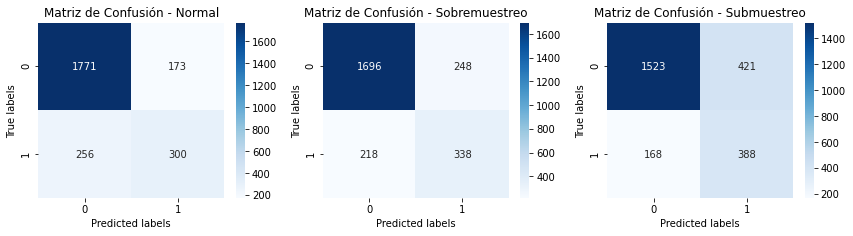

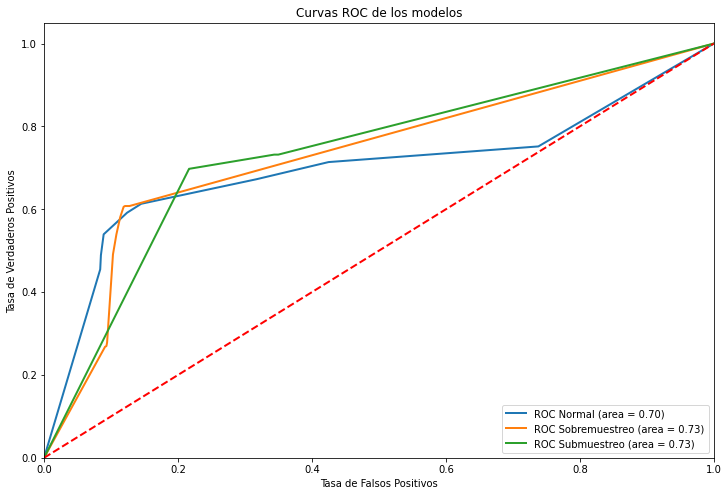

In [24]:
# Crear un diccionario para almacenar las matrices de confusión y las predicciones
confusion_matrices = {}
predictions = {}


# Técnicas de muestro
tecnicas = {
    "Normal": (feat_train, ob_train),
    "Sobremuestreo": (feat_up, ob_up),
    "Submuestreo": (feat_down, ob_down)
            }

# Bucle para cada técnica de muestreo
for tecnica, (feat, ob) in tecnicas.items():
    best_accuracy = 0
    best_depth = 0

    # Bucle que itera con diferentes max_depth
    for depth in range(1, 21):
        model_tree = DecisionTreeClassifier(random_state=12, max_depth=depth)
        model_tree.fit(feat, ob)
        predictions_valid = model_tree.predict(feat_valid)

        accuracy = accuracy_score(ob_valid, predictions_valid)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth

    predictions1 = model_tree.predict(feat_test)
    accuracy_tree = accuracy_score(ob_test, predictions1)
    f1_tree = f1_score(ob_test, predictions1)
    sensitivity_tree = recall_score(ob_test, predictions1)
    
    # Calcular la matriz de confusión
    confusion_matrices[tecnica] = confusion_matrix(ob_test, predictions1)
    predictions[tecnica] = model_tree.predict_proba(feat_test)

    print(f"Resultados para {tecnica}:")
    print("Mejor max_depth =", best_depth, "con precisión de:", best_accuracy)
    print("Test accuracy:", accuracy_tree)
    print("F1 score:", f1_tree)
    print("Recall:", sensitivity_tree)
    print()

# Mostrar las matrices de confusión
plt.figure(figsize=(12, 12))
for i, (tecnica, matriz) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(4, 3, i)
    sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Matriz de Confusión - {tecnica}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
plt.tight_layout()
plt.show()

# Calcular y mostrar las curvas ROC
plt.figure(figsize=(12, 8))
lw = 2
for tecnica, prediction in predictions.items():
    fpr, tpr, _ = roc_curve(ob_test, prediction[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, label=f'ROC {tecnica} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC de los modelos')
plt.legend(loc="lower right")
plt.show()


<span style="color:#427D9D"> __Comentario:__

<span style="color:#427D9D"> __Árbol de decisión Normal__
>- **Verdaderos negativos (TN):** 1771
>- **Falsos positivos (FP):** 173
>- **Falsos negativos (FN):** 256
>- **Verdaderos positivos (TP):** 390

- Este modelo tiene un equilibrio razonable entre falsos positivos y verdaderos positivos, pero podría mejorarse para reducir los falsos negativos.

<span style="color:#427D9D"> __Árbol de decisión Sobremuestreo__
>- **Verdaderos negativos (TN):** 1696
>- **Falsos positivos (FP):** 248
>- **Falsos negativos (FN):** 218
>- **Verdaderos positivos (TP):** 338
- Este modelo tiene un alto número de falsos positivos, lo que indica que está prediciendo incorrectamente clientes que no abandonan el banco como si lo hicieran.
  
<span style="color:#427D9D"> __Árbol de decisión Submuestreo__
>- **Verdaderos negativos (TN):** 1523
>- **Falsos positivos (FP):** 421
>- **Falsos negativos (FN):** 168
>- **Verdaderos positivos (TP):** 388

- Este modelo tiene un equilibrio razonable entre falsos positivos y verdaderos positivos, pero también podría mejorarse para reducir los falsos negativos.

## <span style="color:#39A7FF"> Bosque aleatorio - ROC

El siguiente código evalua:
> - Entrenamiento y Validación
> - Testeo
> - F1
> - Recall
> - Matriz de confusión
> - AUC - ROC

Para:
> - Datos sin considerar el desequilibrio
> - Sobremuestreo
> - Submuestreo

Resultados para Normal:
Mejor n_estimators = 23 con precisión de: 0.8549333333333333
Test accuracy: 0.8388
F1 score: 0.4648074369189907
Recall: 0.3147482014388489

Resultados para Sobremuestreo:
Mejor n_estimators = 45 con precisión de: 0.8538666666666667
Test accuracy: 0.8508
F1 score: 0.5905598243688255
Recall: 0.48381294964028776

Resultados para Submuestreo:
Mejor n_estimators = 44 con precisión de: 0.8096
Test accuracy: 0.8296
F1 score: 0.6402027027027026
Recall: 0.6816546762589928



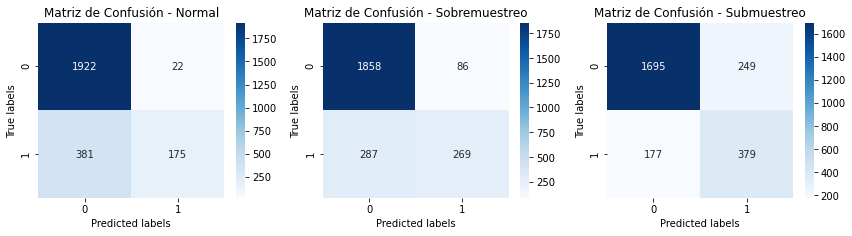

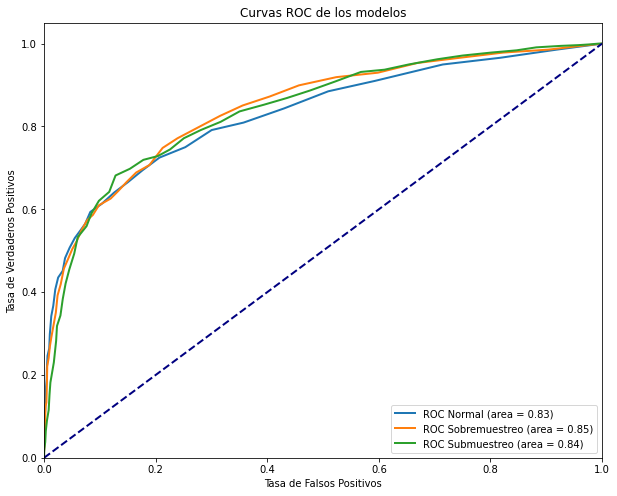

In [25]:
# Técnicas de muestro
tecnicas = {
    "Normal": (feat_train, ob_train),
    "Sobremuestreo": (feat_up, ob_up),
    "Submuestreo": (feat_down, ob_down)
            }


# Crear un diccionario para almacenar las matrices de confusión y las predicciones
confusion_matrices = {}
predictions = {}

# Bucle para cada técnica de muestreo
for tecnica, (feat, ob) in tecnicas.items():
    best_accuracy = 0
    best_depth = 0

    # Bucle que itera con diferentes n_estimators
    for n_estimators in range(1, 51):
        model_forest = RandomForestClassifier(random_state=12, n_estimators=n_estimators)
        model_forest.fit(feat, ob)
        predictions_valid = model_forest.predict(feat_valid)

        accuracy = accuracy_score(ob_valid, predictions_valid)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_estimators = n_estimators

    predictions1 = model_forest.predict(feat_test)
    accuracy_forest = accuracy_score(ob_test, predictions1)
    f1_forest = f1_score(ob_test, predictions1)
    sensitivity_forest = recall_score(ob_test, predictions1)
    
    # Calcular la matriz de confusión
    confusion_matrices[tecnica] = confusion_matrix(ob_test, predictions1)
    predictions[tecnica] = model_forest.predict_proba(feat_test)

    print(f"Resultados para {tecnica}:")
    print("Mejor n_estimators =", best_n_estimators, "con precisión de:", best_accuracy)
    print("Test accuracy:", accuracy_forest)
    print("F1 score:", f1_forest)
    print("Recall:", sensitivity_forest)
    print()

# Mostrar las matrices de confusión
plt.figure(figsize=(12, 12))
for i, (tecnica, matriz) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(4, 3, i)
    sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Matriz de Confusión - {tecnica}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
plt.tight_layout()
plt.show()

# Calcular y mostrar las curvas ROC
plt.figure(figsize=(10, 8))
lw = 2
for tecnica, prediction in predictions.items():
    fpr, tpr, _ = roc_curve(ob_test, prediction[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, label=f'ROC {tecnica} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC de los modelos')
plt.legend(loc="lower right")
plt.show()


<span style="color:#39A7FF">__Comentario:__

<span style="color:#39A7FF">__Bosque Aleatorio Normal__
>- **Verdaderos negativos (TN):** 1922
>- **Falsos positivos (FP):** 21
>- **Falsos negativos (FN):** 381
>- **Verdaderos positivos (TP):** 175
  - El modelo tiene un número considerablemente alto de falsos negativos (381), lo que indica que clasifica erróneamente muchas instancias de "churn" como "no churn" en una proporción de 2 a 1. Esto sugiere que el modelo podría mejorar en la identificación de clientes propensos a abandonar el banco.
  

<span style="color:#39A7FF">__Bosque Aleatorio Sobremuestreo__
>- **Verdaderos negativos (TN):** 1858
>- **Falsos positivos (FP):** 86
>- **Falsos negativos (FN):** 287
>- **Verdaderos positivos (TP):** 269
  
<span style="color:#39A7FF">__Bosque Aleatorio Submuestreo__
>- **Verdaderos negativos (TN):** 1695
>- **Falsos positivos (FP):** 249
>- **Falsos negativos (FN):** 177
>- **Verdaderos positivos (TP):** 379
  - El modelo tiene ha mejorado considerablemente su desempeño frente a los otros dos, no obstante, esta mejora tiene una consecuencia, ahora predice más falsos positivos.

*** 
<span style="color:#FF6C22"> __Comparaciones:__ 

> La siguiente tabla recopila diferentes resultados de F1 cuando se cambiaron los parámetros de la segmentación para entrenamiento, validación, Testeto, veces por la que se multiplico en el sobremuestreo, y reducción en submuestreo.
>
> Resulta destacado que el sumbmuestreo en bosque aleatorio supero todas las pruebas
>
> Posteriormente se hará un gráfico para apreciar mejor que modelo es mejor.




| Test|Validación|Sobremuestreo|Submuestreo|Árbol_Normal|Bosque_normal|Árbol_up|Bosque_up|Árbol_down|Bosque_down|
|-----|----------|-------------|-----------|------------|-------------|--------|---------|---------|------------|
| 0.2 |   0.2    |    5        |     0.4   | 0.58       | 0.5         | 0.57   |0.58     |  0.55   |0.5945      |
| 0.23|   0.23   |    5        |     0.4   | 0.54       | 0.51        | 0.56   |0.5957   |  0.56   |0.6203      |
| 0.24|   0.24   |    5        |     0.4   | 0.55       | 0.49        | 0.55   |0.58     |  0.57   |0.6227      |
| 0.25|   0.25   |    4        |     0.3   | 0.58       | 0.46        | 0.5919 |0.5905   |  0.56   |0.6402      |
| 0.25|   0.25   |    5        |     0.4   | 0.58       | 0.47        | 0.57   |0.59016  |  0.57   |0.6359      |
| 0.25|   0.25   |    6        |     0.5   | 0.58       | 0.47        | 0.56   |0.5908   |  0.57   |0.6219      |
| 0.27|   0.27   |    4        |     0.4   | 0.56       | 0.49        | 0.54   |0.58     |  0.55   |0.61        |
| 0.28|   0.27   |    5        |     0.3   | 0.58       | 0.5         | 0.58   |0.5906   |  0.56   |0.5916      |
| 0.28|   0.27   |    6        |     0.4   | 0.58       | 0.5         | 0.55   |0.55     |  0.57   |0.6195      |
| 0.3 |   0.25   |    5        |     0.3   | 0.54       | 0.46        | 0.56   |0.56     |  0.55   |0.6         |
| 0.35|   0.2    |    5        |     0.3   | 0.57       | 0.46        | 0.56   |0.54     |  0.53   |0.598       |
| 0.27|   0.27   |    4        |     0.4   | 0.56       | 0.49        | 0.54   |0.58     |  0.55   |0.61        |

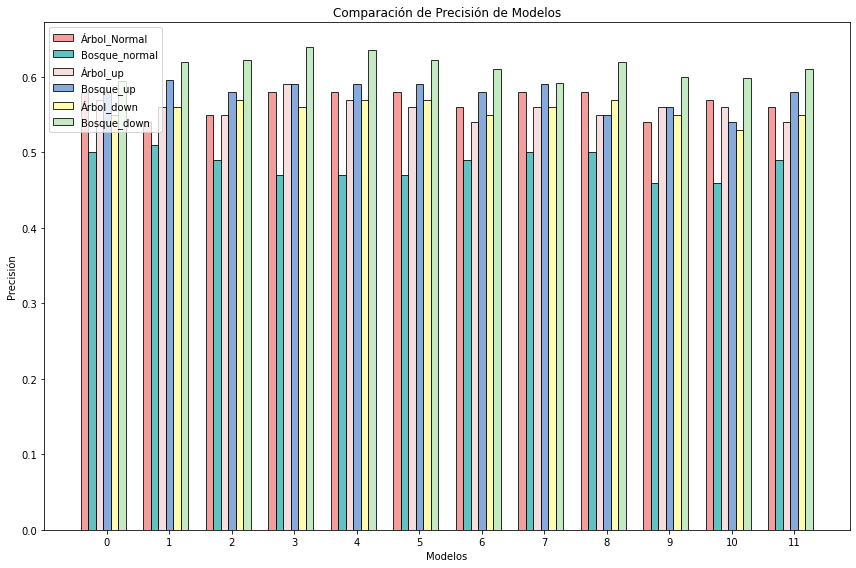

In [26]:
# Crear un DataFrame con los datos proporcionados
data = {
    'Árbol_Normal': [0.58, 0.54, 0.55, 0.58, 0.58, 0.58, 0.56, 0.58, 0.58, 0.54, 0.57, 0.56],
    'Bosque_normal': [0.5, 0.51, 0.49, 0.47, 0.47, 0.47, 0.49, 0.5, 0.5, 0.46, 0.46, 0.49],
    'Árbol_up': [0.57, 0.56, 0.55, 0.59, 0.57, 0.56, 0.54, 0.56, 0.55, 0.56, 0.56, 0.54],
    'Bosque_up': [0.58, 0.5957, 0.58, 0.5905, 0.59016, 0.5908, 0.58, 0.5906, 0.55, 0.56, 0.54, 0.58],
    'Árbol_down': [0.55, 0.56, 0.57, 0.56, 0.57, 0.57, 0.55, 0.56, 0.57, 0.55, 0.53, 0.55],
    'Bosque_down': [0.5945, 0.6203, 0.6227, 0.6402, 0.6359, 0.6219, 0.61, 0.5916, 0.6195, 0.6, 0.598, 0.61]
}

results_df = pd.DataFrame(data)

# Configuración de las barras
barWidth = 0.12
r = np.arange(len(results_df.index))

# Crear gráfico de barras
plt.figure(figsize=(12, 8))

plt.bar(r - 3*barWidth, results_df['Árbol_Normal'],  width=barWidth, label='Árbol_Normal',  color="#F28585", edgecolor="black", alpha=0.8)
plt.bar(r - 2*barWidth, results_df['Bosque_normal'], width=barWidth, label='Bosque_normal', color="#37B5B6", edgecolor="black", alpha=0.8)
plt.bar(r - barWidth,   results_df['Árbol_up'],      width=barWidth, label='Árbol_up',      color="#F6D6D6", edgecolor="black", alpha=0.8)
plt.bar(r,              results_df['Bosque_up'],     width=barWidth, label='Bosque_up',     color="#6895D2", edgecolor="black", alpha=0.8)
plt.bar(r + barWidth,   results_df['Árbol_down'],    width=barWidth, label='Árbol_down',    color="#FFFC9B", edgecolor="black", alpha=0.8)
plt.bar(r + 2*barWidth, results_df['Bosque_down'],   width=barWidth, label='Bosque_down',   color="#B7E5B4", edgecolor="black", alpha=0.8)

plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Comparación de Precisión de Modelos')
plt.xticks(r, results_df.index, rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


Después de revisar los resultados, se pueden observar varias tendencias y resultados interesantes:

> __Desempeño general:__ Los modelos parecen tener un desempeño razonablemente bueno en términos de precisión y F1-score, con valores que van desde alrededor de 0.5 hasta 0.6, lo cual indica una capacidad moderada para predecir la fuga de clientes.
> - __Impacto de la segmentación de datos:__ Se observa que el desempeño varía según la segmentación de los datos. En general, los modelos entrenados con datos de submuestreo (down-sampling) tienden a tener un mejor desempeño que los modelos entrenados con datos de sobremuestreo (up-sampling), especialmente en términos de F1-score y precisión.
> - __Impacto de los parámetros de prueba:__ La variación en los parámetros de prueba (Test y Validación) parece tener un impacto significativo en el desempeño de los modelos. Por ejemplo, se observa que un valor de 0.2 para ambos parámetros tiende a producir un mejor desempeño en comparación con otros valores.
> - __Diferencias entre modelos:__ En general, el Bosque Aleatorio tiende a tener un desempeño ligeramente mejor que el Árbol de Decisión en términos de F1-score y precisión, especialmente en los casos de sobremuestreo y submuestreo.
>
>En resumen, los resultados sugieren que el modelo de Bosque Aleatorio entrenado con datos de sobremuestreo podría ser la mejor opción para predecir la fuga de clientes en este caso. Sin embargo, sería necesario realizar una evaluación más detallada, como la optimización de hiperparámetros y la validación cruzada, para confirmar esta conclusión.


## <span style="color:#FF6969"> Regresión logística

El siguiente código evalua:
> - Entrenamiento y Validación
> - Testeo
> - F1
> - Recall
> - Matriz de confusión
> - AUC - ROC

Para:
> - Datos sin considerar el desequilibrio
> - Sobremuestreo
> - Submuestreo

Resultados para Normal:
Mejor C = 0.001 con precisión de: 0.8
Test accuracy: 0.7776
F1 score: 0.0
Recall: 0.0

Resultados para Sobremuestreo:
Mejor C = 0.001 con precisión de: 0.5034666666666666
Test accuracy: 0.5204
F1 score: 0.3784344219803007
Recall: 0.6564748201438849

Resultados para Submuestreo:
Mejor C = 0.001 con precisión de: 0.6405333333333333
Test accuracy: 0.6428
F1 score: 0.3072148952676494
Recall: 0.35611510791366907



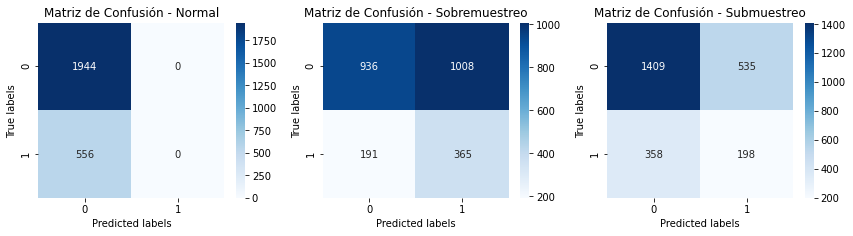

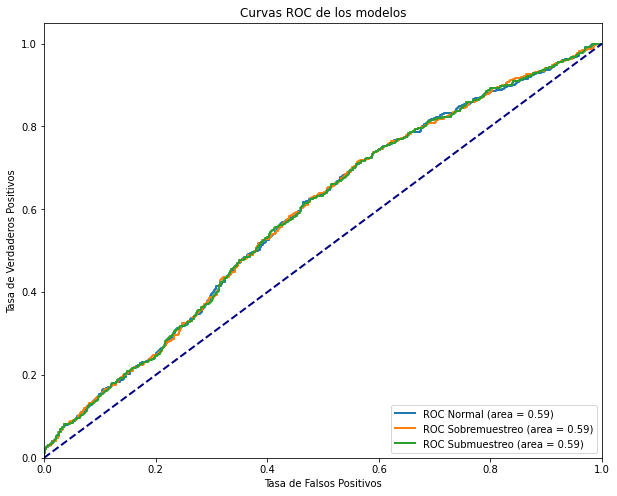

In [27]:
# Técnicas de muestro
tecnicas = {
    "Normal": (feat_train, ob_train),
    "Sobremuestreo": (feat_up, ob_up),
    "Submuestreo": (feat_down, ob_down)
            }
# Crear un diccionario para almacenar las matrices de confusión y las predicciones
confusion_matrices = {}
predictions = {}

# Bucle para cada técnica de muestreo
for tecnica, (feat, ob) in tecnicas.items():
    best_accuracy = 0
    best_c = 0

    # Bucle que itera con diferentes valores de C
    for c_value in [0.001, 0.01, 0.1, 1, 10, 100]:
        model_lr = LogisticRegression(random_state=12, C=c_value)
        model_lr.fit(feat, ob)
        predictions_valid = model_lr.predict(feat_valid)

        accuracy = accuracy_score(ob_valid, predictions_valid)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_c = c_value

    predictions1 = model_lr.predict(feat_test)
    accuracy_lr = accuracy_score(ob_test, predictions1)
    f1_lr = f1_score(ob_test, predictions1)
    sensitivity_lr = recall_score(ob_test, predictions1)
    
    # Calcular la matriz de confusión
    confusion_matrices[tecnica] = confusion_matrix(ob_test, predictions1)
    predictions[tecnica] = model_lr.predict_proba(feat_test)

    print(f"Resultados para {tecnica}:")
    print("Mejor C =", best_c, "con precisión de:", best_accuracy)
    print("Test accuracy:", accuracy_lr)
    print("F1 score:", f1_lr)
    print("Recall:", sensitivity_lr)
    print()

# Mostrar las matrices de confusión
plt.figure(figsize=(12, 12))
for i, (tecnica, matriz) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(4, 3, i)
    sns.heatmap(matriz, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Matriz de Confusión - {tecnica}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
plt.tight_layout()
plt.show()

# Calcular y mostrar las curvas ROC
plt.figure(figsize=(10, 8))
lw = 2
for tecnica, prediction in predictions.items():
    fpr, tpr, _ = roc_curve(ob_test, prediction[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, label=f'ROC {tecnica} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC de los modelos')
plt.legend(loc="lower right")
plt.show()


<span style="color:#FF6969">__Comentario:__

<span style="color:#FF6969">__Regresión Logística Normal__
>- **Verdaderos negativos (TN):** 1944
>- **Falsos positivos (FP):** 0
>- **Falsos negativos (FN):** 556
>- **Verdaderos positivos (TP):** 0

- Este modelo no predijo ningún caso positivo, lo cual indica que no está clasificando correctamente los casos de abandono.

<span style="color:#FF6969">__Regresión Logística Sobremuestreo__
>- **Verdaderos negativos (TN):** 936
>- **Falsos positivos (FP):** 1008
>- **Falsos negativos (FN):** 191
>- **Verdaderos positivos (TP):** 365

- Este modelo tiene un número significativo de falsos positivos, lo que indica que está prediciendo incorrectamente clientes que no abandonan el banco como si lo hicieran.
  
<span style="color:#FF6969">__Regresión Logística Submuestreo__
>- **Verdaderos negativos (TN):** 1409
>- **Falsos positivos (FP):** 535
>- **Falsos negativos (FN):** 358
>- **Verdaderos positivos (TP):** 198

- Este modelo tiene un equilibrio relativamente mejor entre falsos positivos y verdaderos positivos en comparación con el modelo de sobremuestreo, pero aún presenta un número considerable de falsos negativos.

## <span style="color:#FFA732"> Conclusiones


El DataFrame original tenía un desequilibrio en la siguiente proporción:

|Situación|Proporción|
|---------|----------|
|Permanece| 80%      |
|Se ha ido| 20%      |

Esto representa un problema ya que, los modelos aprenden mejor las caracteristicas de los usuarios que deciden permanecer en el banco en detrimento de las que no. En consecuencia se hicieron 3 pruebas, a saber: Sin considerar el equilibrio, y Sobremuestro y Submuestreo considerando el equilibrio.


> - Bosque Aleatorio - Submuestreo en una relación de 64 predicciones correctas por cada 100
> - Los modelos de árbol de decisión y bosque aleatorio mostraron un mejor desempeño en la predicción de la fuga de clientes en comparación con la regresión logística. Además, la técnica de sobremuestreo pareció ser más efectiva para mejorar el desempeño de ambos modelos en comparación con la técnica de submuestreo.
> - Como dato interesante el Árbol de decisión sin considerar el equilibrio tuvo un desempeño decente con una tasas de 58 precciones correctas por ada 100.
> - En las matrices de confusión queda en evidencia que los modelos aciertan con mayor frecuencia en los clientes que es más probable que no abandonen el banco, esto tiene sentido por el desequlibrio en la información disponible en la base de datos.

*** 

<span style="color:#FFA732">__Respecto al análisis inicial con las gráficas__

> - __Operación geográfica:__  El banco opera en tres países europeos: Francia, España y Alemania.
> - __Distribución geográfica de clientes:__ Francia es el país con la mayor cantidad de clientes, lo que podría indicar una mayor base de clientes potenciales en ese país.
> - __Tasa de abandono:__ Aunque Alemania tiene una gran cantidad de clientes, también tiene la mayor tasa de abandono entre los tres países, lo que sugiere posibles problemas o insatisfacciones específicas en el mercado alemán que podrían investigarse más a fondo.
> - __Edad promedio:__ La edad promedio de los clientes del banco está entre 30 y 40 años, lo que podría indicar un perfil de cliente más joven y en edad laboral.
> - __Edad de abandono:__ La edad en la que los clientes abandonan el banco está entre 40 y 55 años, lo que sugiere que los clientes podrían estar abandonando el banco después de un período de relación más largo o en momentos de cambios significativos en sus vidas (por ejemplo, jubilación).
> - __Productos contratados:__ La mayoría de los clientes tienen entre 1 y 2 productos contratados, lo que podría indicar que los clientes prefieren mantener una relación bancaria más simple.
> - __Productos y abandono:__ Es interesante observar que la mayoría de los clientes que deciden abandonar el banco tienen 3 o 4 productos contratados, lo que podría indicar que los clientes con una relación bancaria más compleja tienen más probabilidades de abandonar.
> - __Correlaciones significativas:__ Las correlaciones encontradas entre el abandono y la edad, el abandono y el saldo de la cuenta, y el abandono y ser miembro activo son importantes y pueden indicar áreas clave para enfocar las estrategias de retención de clientes.
> - __Diferencias de género:__ Las mujeres tienen una tendencia ligeramente mayor a abandonar el banco en comparación con los hombres, lo que podría ser importante al desarrollar estrategias de retención que se adapten a las necesidades y preferencias de género.
> - __Saldo y país:__ Alemania es el país con el mayor saldo promedio de cuenta, lo que podría indicar diferencias en la actividad bancaria y la capacidad financiera entre los países.
Estas conclusiones podrían ser útiles para el banco al diseñar estrategias de retención de clientes, segmentar el mercado y mejorar la satisfacción del cliente en general.

***
Se pueden identificar algunas relaciones entre los puntos mencionados:

> - __Edad y abandono:__ Existe una relación entre la edad y la tasa de abandono. Los clientes más jóvenes (entre 30 y 40 años) conforman la mayoría de la base de clientes y tienen una tasa de abandono más baja, mientras que los clientes que abandonan el banco tienden a tener edades entre 40 y 55 años. Esto sugiere que los clientes más jóvenes pueden estar más satisfechos con los servicios del banco o tienen menos motivos para abandonarlo en comparación con los clientes mayores.
> - __Número de productos y abandono:__ También se observa una relación entre el número de productos contratados y la tasa de abandono. Los clientes que tienen 3 o 4 productos contratados tienen más probabilidades de abandonar el banco. Esto podría indicar que los clientes con una relación bancaria más compleja pueden estar insatisfechos o enfrentar dificultades que los llevan a abandonar.
> - __Saldo y abandono:__ Aunque no se mencionó específicamente en tus puntos, el saldo de la cuenta también podría estar relacionado con la tasa de abandono. Los clientes con saldos más altos podrían tener expectativas más altas sobre los servicios del banco y podrían ser más propensos a abandonar si no se satisfacen sus necesidades.
